In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

# Verinin Yüklenmesi

In [19]:
rock_data=pd.read_csv("../input/0.csv",header=None) #Rock gesture signals
scis_data=pd.read_csv("../input/1.csv",header=None)  #Siccors gesture signals
paper_data=pd.read_csv("../input/2.csv",header=None)  #Paper gesture signals
ok_data=pd.read_csv("../input/3.csv",header=None)  #Ok gesture signals
rock_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [21]:
print("Rock Shape: ",rock_data.shape,
      "\nScissor Shape: ",scis_data.shape,
      "\nPaper Shape: ",paper_data.shape,
      "\nOK Shape: ",ok_data.shape)

Rock Shape:  (2910, 65) 
Scissor Shape:  (2903, 65) 
Paper Shape:  (2943, 65) 
OK Shape:  (2922, 65)


# Görselleştirme

## Sensörlerin Histogram Dağılımı

In [81]:
def plot_sensor(data,name,color):
    color_list=["navy","darkmagenta","red","black"]
    fig, ax = plt.subplots(2,4, figsize=(20,12))
    sns.set(style="white")
    sns.set(style="whitegrid")
    x=0
    for i in range(2):
        for j in range(4):
            plt.suptitle(name)
            #rock_data.iloc[:,i].plot.hist(bins=10,ax=ax[i][j],grid=True)
            sns.distplot(data.iloc[:,x],kde=False,ax=ax[i][j],color=color_list[color],bins=15);
            x+=1
            if i==1:
                ax[i][j].set_title("Sensor_"+str(j+5))
            else:
                ax[i][j].set_title("Sensor_"+str(j+1))
    plt.show()
    

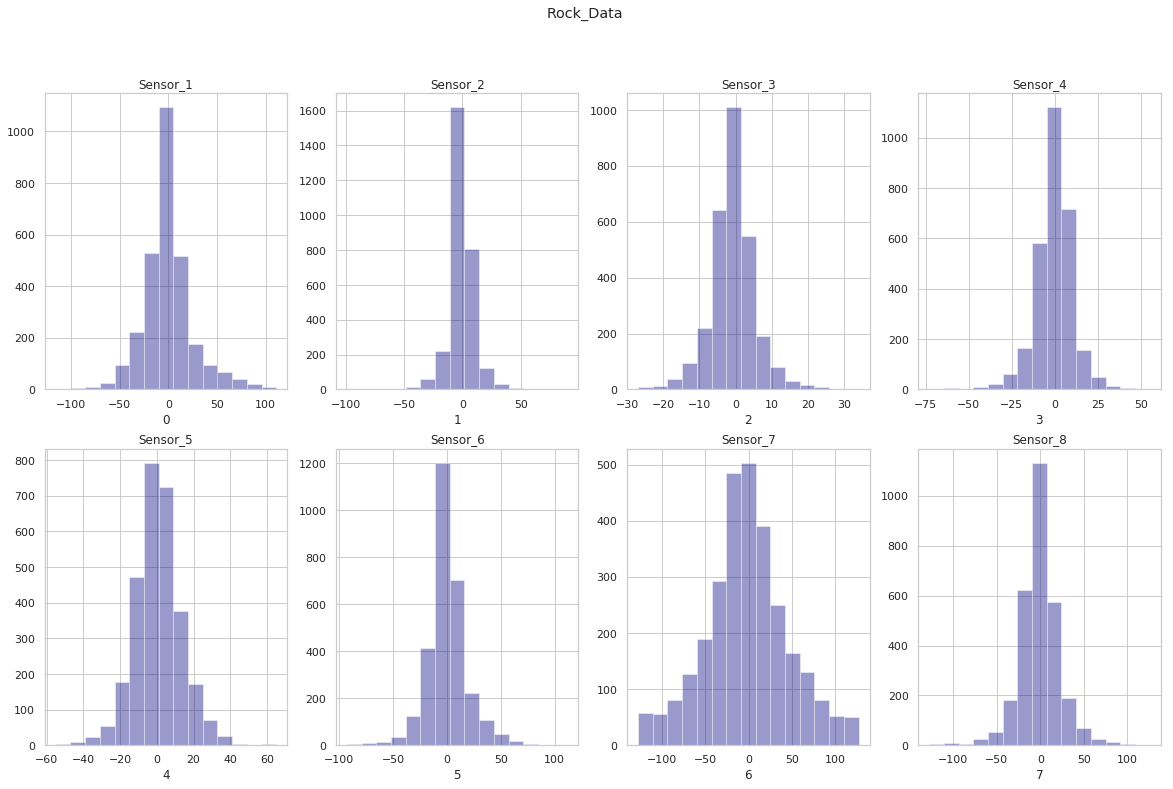

In [79]:
plot_sensor(rock_data,"Rock_Data",0)

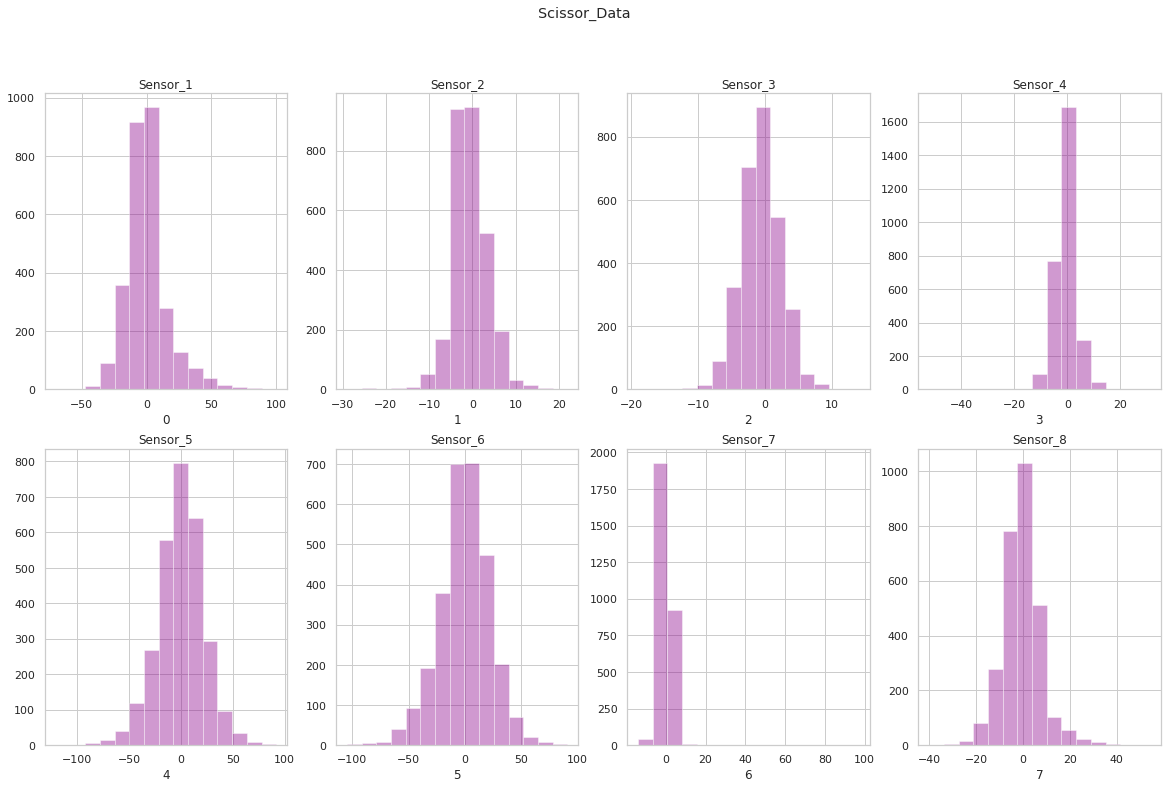

In [80]:
plot_sensor(scis_data,"Scissor_Data",1)

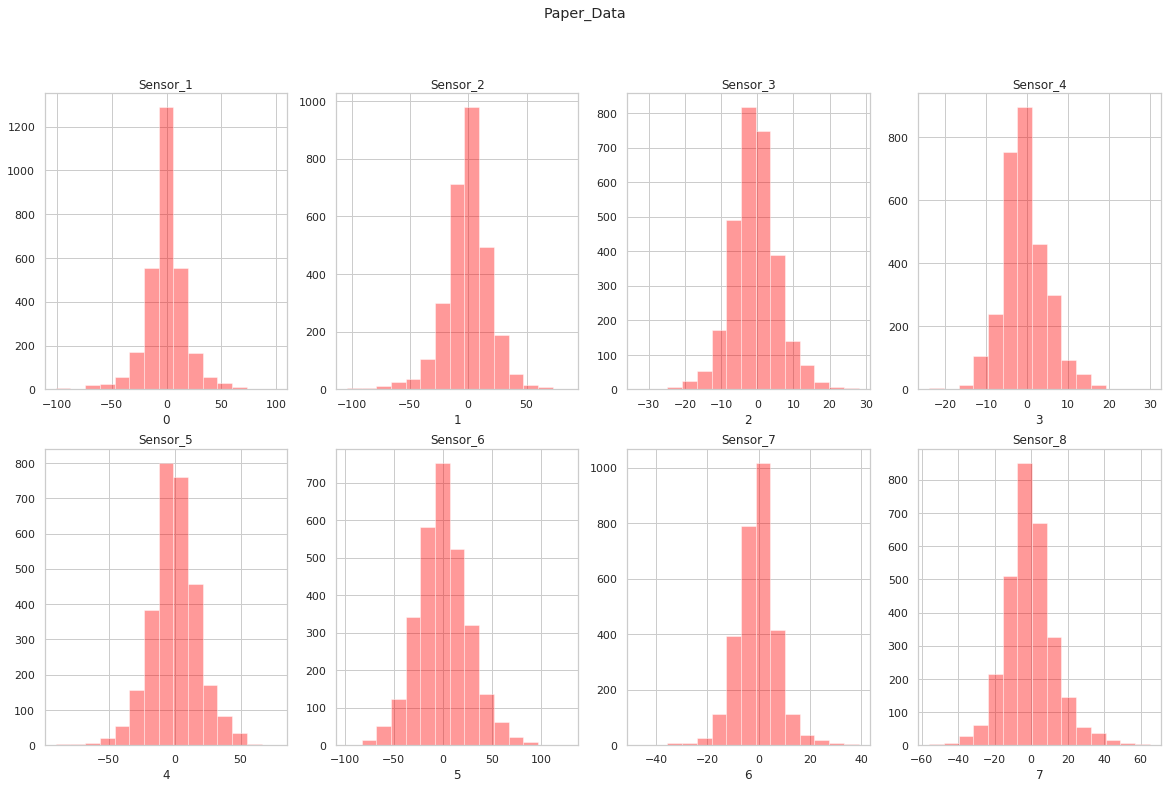

In [82]:
plot_sensor(paper_data,"Paper_Data",2)

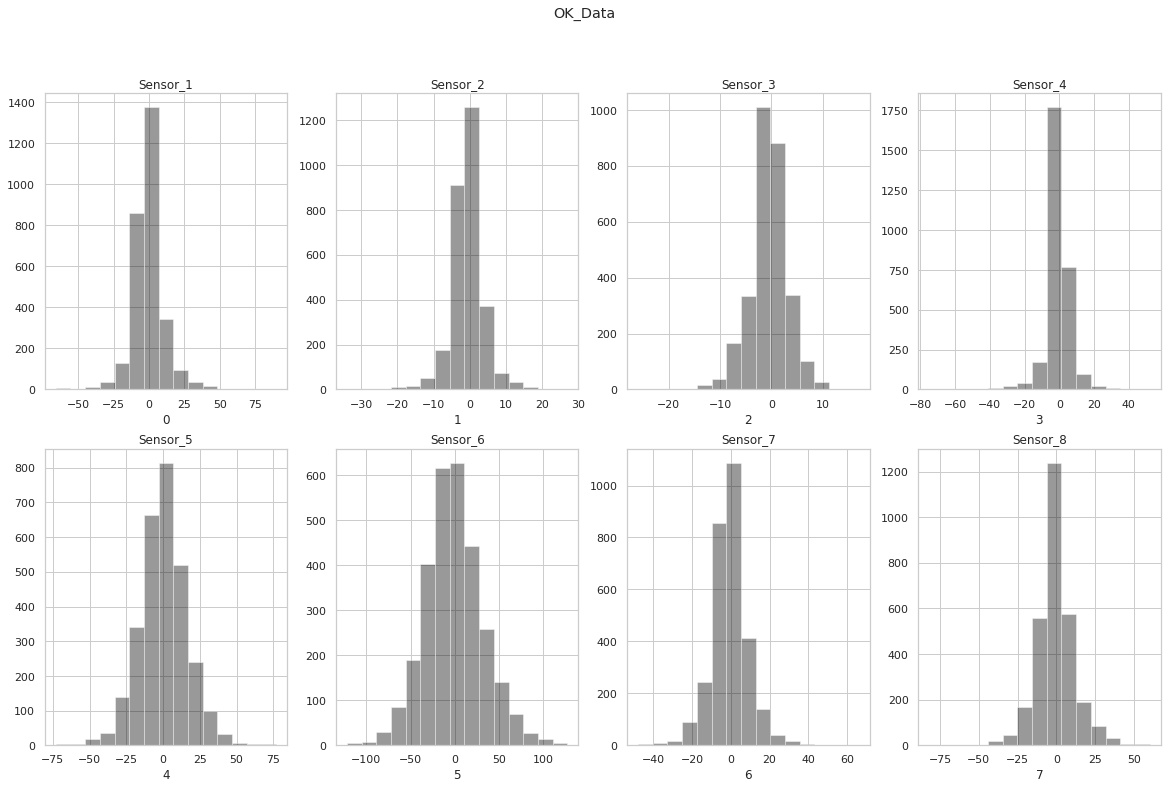

In [83]:
plot_sensor(ok_data,"OK_Data",3)

## Time - Series EMG Sinyali

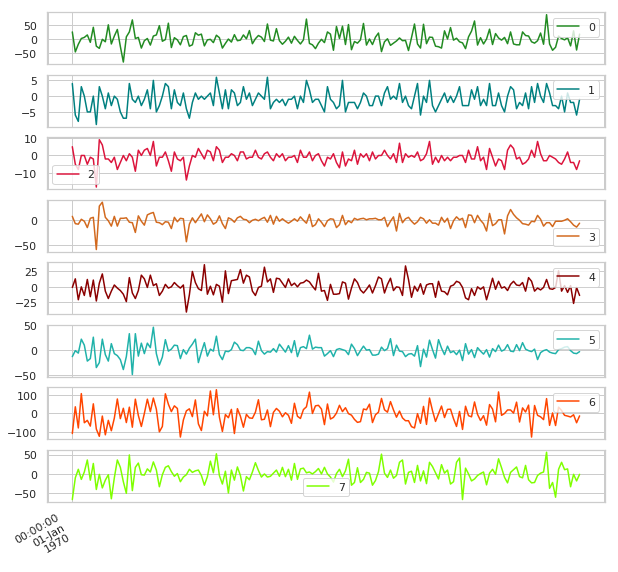

In [89]:
colors=["forestgreen","teal","crimson","chocolate","darkred","lightseagreen","orangered","chartreuse"]
time_rock=rock_data.iloc[:,0:8]
time_rock.index=pd.to_datetime(time_rock.index)
time_rock.iloc[:170,:].plot(subplots=True,figsize=(10,10),colors=colors);

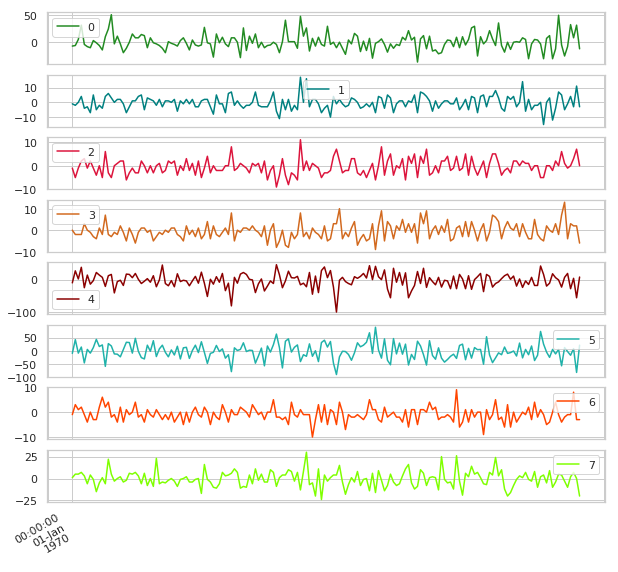

In [90]:
time_scis=scis_data.iloc[:,0:8]
time_scis.index=pd.to_datetime(time_scis.index)
time_scis.iloc[:170,:].plot(subplots=True,figsize=(10,10),colors=colors);

# Verinin Birleştirilmesi

In [91]:
datas=pd.concat([rock_data,scis_data,paper_data,ok_data],ignore_index=True)
df=datas.copy()
#Kolon isimlerini String yaptım.
liste=[str(x) for x in range(65)]
df.columns=liste 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


# Modeller Kurma

## **Naive Bayes**

In [92]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X=df.drop(["64"],axis=1)
y=df["64"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

naive=GaussianNB().fit(X_train,y_train)
naive

GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
y_pred=naive.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8831335616438356


In [94]:
y_test.head()

11229    3
11658    3
2142     0
7458     2
2348     0
Name: 64, dtype: int64

In [95]:
y_pred[0:5]

array([3, 3, 0, 2, 0])

## KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
kneigh=KNeighborsClassifier()
k_model=kneigh.fit(X_train,y_train)
k_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [97]:
y_pred=k_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.6875


## KNN Model Tuning

In [99]:
params={"n_neighbors": np.arange(1,10)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [100]:
knn_cv.best_params_

{'n_neighbors': 9}

In [101]:
knn_model=KNeighborsClassifier(n_neighbors=9)
knn_tuned=knn_model.fit(X_train,y_train)
knn_tuned

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [102]:
y_pred=knn_tuned.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.6887842465753424


## Yapay Sinir Ağı

In [103]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier().fit(X_train_scaled,y_train)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [104]:
y_pred=mlp.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9375

## CatBoost

In [105]:
from catboost import CatBoostClassifier

cat_model=CatBoostClassifier(silent=True).fit(X_train,y_train)

y_pred=cat_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.958904109589041